In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
plt.rcParams.update({'font.size': 20})

# Problem#1 Newman 7.8 (with content from 5.19): Diffraction gratings

Given that,

$$\large I(x)=\left|\int_{-w/2}^{w/2}\sqrt{q(u)}e^{i2\pi xu/\lambda f}du\right|^2$$
And,

$$\large \int_{-w/2}^{w/2}\sqrt{q(u)}e^{i2\pi xu/\lambda f}du\simeq\frac{w}{N}e^{i\pi k}\sum_{n=0}^{N-1}y_n e^{i2\pi kn/N}$$

 where, 

$$ \large y_n=\sqrt{q(u_n)}$$

Therefore, $$\large I(x_k)=\frac{w^2}{N^2}|c_k|^2$$ where $c_k=\sum_{n=0}^{N-1}y_ne^{i2\pi kn/N}$ are fourier coefficients 

## Part (a)

Choose a suitable number of points N (e.g. powers of 10) to give a good approximation to the grating transmission function, by plotting various values and finding one that captures all the features of the function.

In [3]:
def gratting_func(alpha,w,N):
    u_n=np.arange(0,N,1)*w/N-0.5*w
    q_n=(np.sin(alpha*u_n))**2
    return q_n

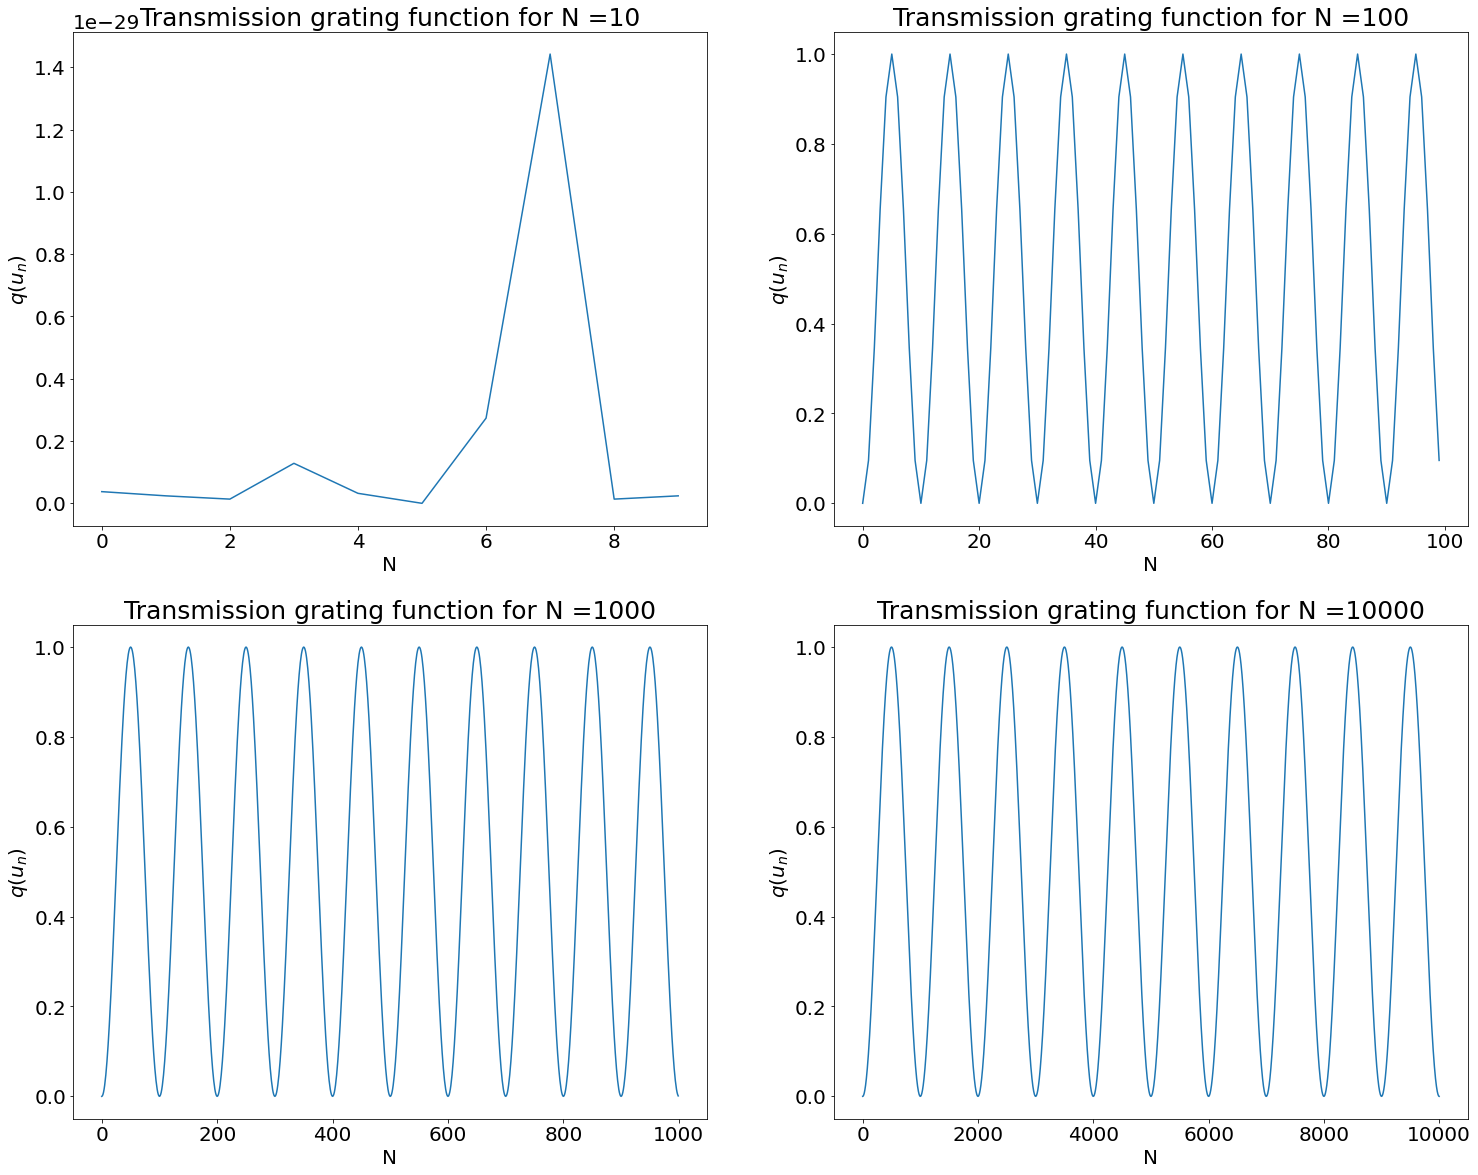

In [4]:
alpha=np.pi/20e-6    ### width of slits are 20 μm, alpha is given as pi/20 μm
w=200e-6
fig = plt.figure(figsize=(25,20))
N=[10,100,1000,10000]
for n in range(len(N)) :
    plt.subplot(2,2,n+1)
    plt.xlabel("N")
    plt.ylabel("$q(u_n)$")               ### q_n=sin^2(alpa*u_n)
    plt.title('Transmission grating function for N ='+str(N[n]), fontsize=25)
    plt.plot(gratting_func(alpha,w,N[n]))
plt.show()

So I think both $N=100$ and $N=1000$ is capturing all the features of the grating function and N=1000 is also smooth.

Choosing between N=1000 and $N=100$?\
Because,for N=100 $q(u_n)$ is showing sharp edges which is a sign of non-differentiable function which should not be an issue though as we won't need to differentiate $q(u_n)$, So I am starting with $\textbf{N=100}$

## Part (b)


$\textbf{Question:}$ Calculate the diffraction pattern according this approach. Write a Python program that uses a fast Fourier transform to calculate the diffraction pattern for a grating with transmission function and parameters above, and then make a graph of the diffraction intensity on the screen.

$\textbf{Solution:}$
$$\large I(x_k)=\frac{w^2}{N^2}|c_k|^2$$
where
$$\large x_k=\frac{\lambda f}{w}k$$
where $f=1 m$ is the focal length of lense, and $\lambda= 500 nm$ given

In [5]:
###calculating I(x_k)
alpha=np.pi/20e-6
w=200e-6
N=100
y_n=np.sqrt(gratting_func(alpha,w,N))   ### y_n=√q(u)
c_k=np.fft.fft(y_n)
c_k_0=np.fft.fftshift(c_k)              ### shifted the Fourier spectrum so that k=0 would be in the center
I_x=(w**2/N**2)*(abs(c_k_0)**2)

In [6]:
###calculating x_k
lamb=500e-9
f=1
k=np.arange(-N//2,N//2,1)
x_k=(lamb*f)/w*k   ###x_k values are are in length unit meter

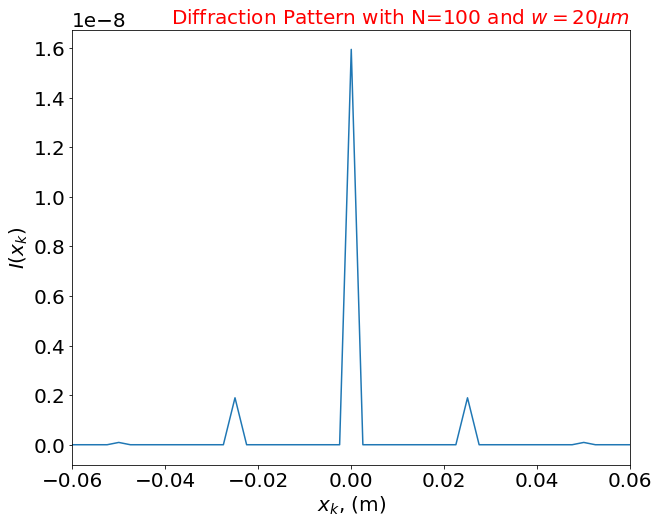

In [7]:
fig = plt.figure(figsize=(10,8))
plt.xlabel("$x_k$, (m)")
plt.ylabel("$I(x_k)$")               
plt.title('Diffraction Pattern with N=100 and $w=20µm$', fontsize=20,loc='right',color='red')
plt.plot(x_k,I_x)
plt.xlim(-0.06,0.06)   ### plotting intensities within the width of screen i.e 10 cm or 0.1m 
plt.show()

$\textbf{Note: Width of screen is 10cm so I need to include the point -0.05 and 0.05 which is why I plotted in limit (-0.06,0.06)}$

$\textbf{Part b(ii) Question:}$Plot for different values of N, informed by your
conclusion in (a). Find a value of N that produces a converged result, e.g. the results
for N and 10N look the same in the plot. Note that the number of points on the
screen is independent of N – while you get more points total with larger N, these
extra points are off the screen and are not relevant.

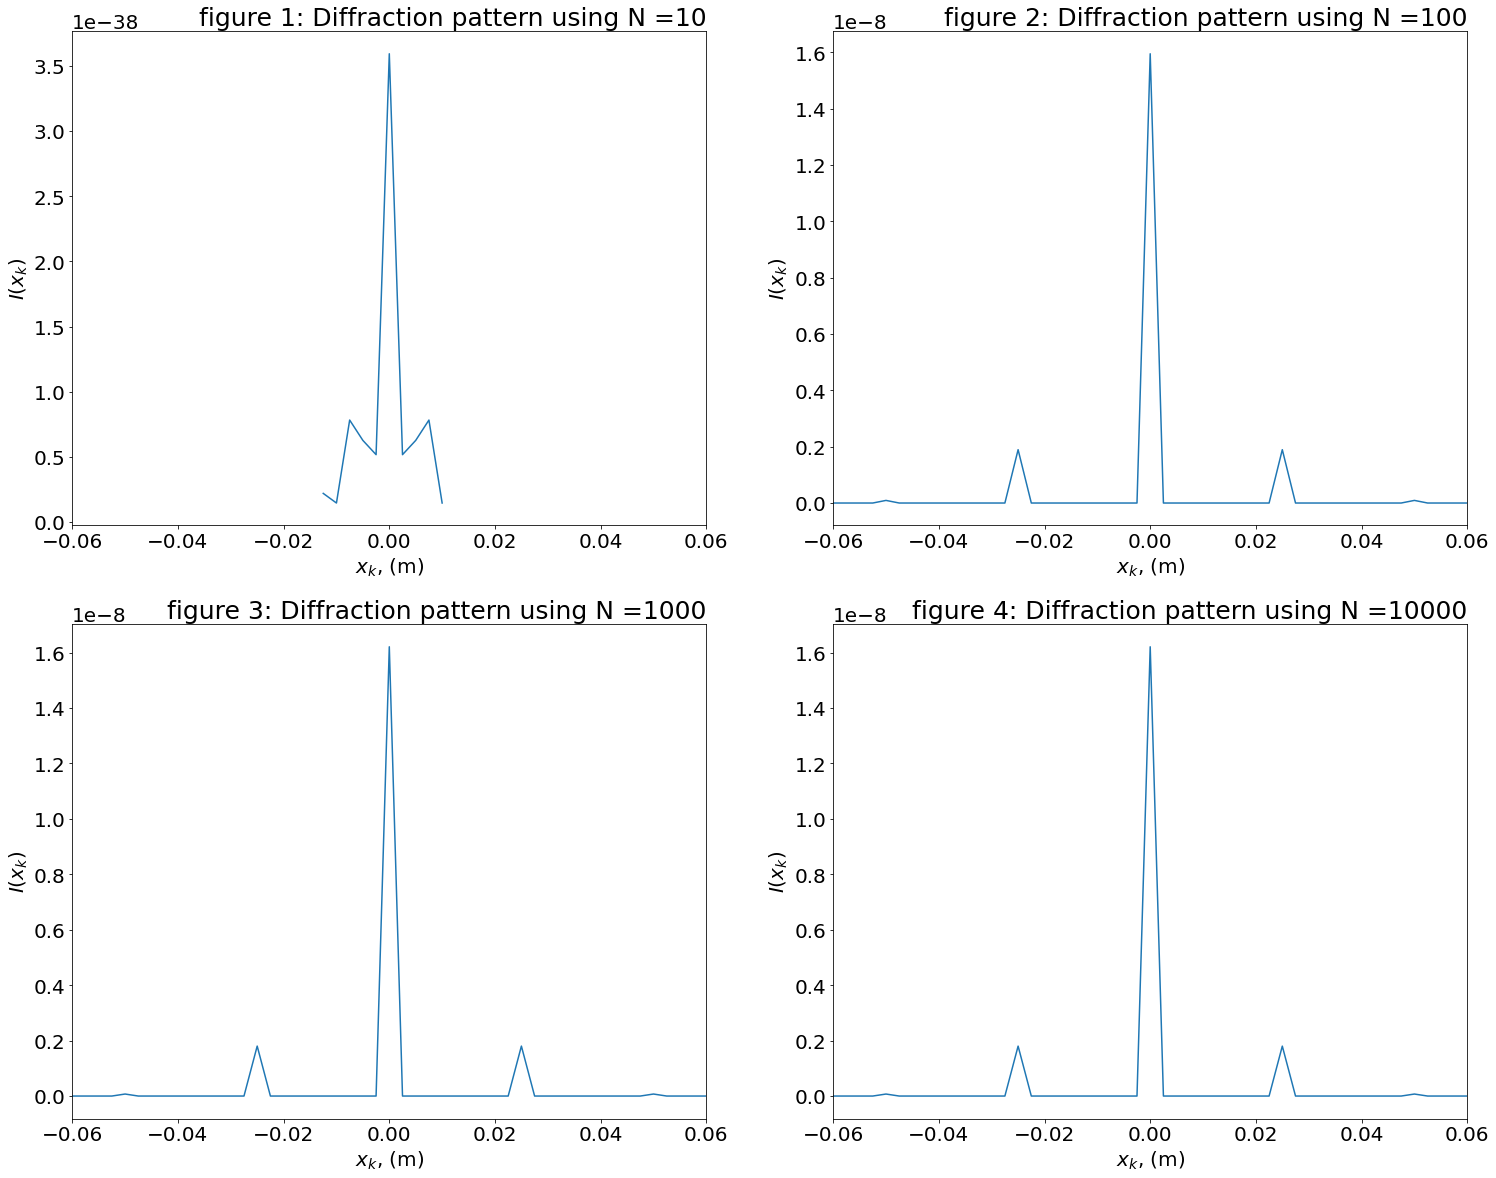

In [8]:
alpha=np.pi/20e-6    ### width of slits are 20 μm, alpha is given as pi/20 μm
w=200e-6
fig = plt.figure(figsize=(25,20))
N=[10,100,1000,10000]
for n in range(len(N)) :
    plt.subplot(2,2,n+1)
    plt.xlabel("$x_k$, (m)")
    plt.ylabel("$I(x_k)$")               ### q_n=sin^2(alpa*u_n)
    plt.title('figure '+str(n+1)+': Diffraction pattern using N ='+str(N[n]), fontsize=25,loc='right')

    Yn=np.sqrt(gratting_func(alpha,w,N[n]))   ### instead w, this time we are calculating using W
    Ck=np.fft.fft(Yn)
    Ck0=np.fft.fftshift(Ck)              ### shifted the Fourier spectrum so that k=0 would be in the center
    IX=(w**2/N[n]**2)*(abs(Ck0)**2)      
    kn=np.arange(-N[n]//2,N[n]//2,1)
    Xk=(lamb*f)/w*kn
    plt.plot(Xk,IX)
    plt.xlim(-0.06,0.06)  
plt.show()

## Part (c)

So in part b, for N=100, N=1000, and N=10000 Diffraction pattern looks same but if we increase the width by a factor of 10 then accordindly we need to increase the N. Since $N=100$ is the minimum number of points to capture all the feature for $w=20µm$. So we can try with W=10w and N=1000. 
Note: for $w=2000µm$, $N=100$ doesn't work because the grating function is not able to capture all features for that parameter regime. Minimum number of points for $w=2000µm$ are $N=1000$. 

In [9]:
###calculating I(x_k) with increased width W=10w
alpha=np.pi/20e-6
W=2000e-6    ###W=10w
N=1000
Y_n=np.sqrt(gratting_func(alpha,W,N))##instead of w, this time we are calculating using W=10w and N'=10N (i.e 1000)
# ##“padding out” the extra data points yn
for i in range(len(Y_n)):    
    if i>0.1*len(Y_n):       ## As suggested in the problem making rest of the Y[n]=0 only keeping first 100 terms
        Y_n[i]=0
C_k=np.fft.fft(Y_n)
C_k_0=np.fft.fftshift(C_k)          ## shifted the Fourier spectrum so that k=0 would be in the center
IX=(w**2/N**2)*(abs(C_k_0)**2)
###calculating x_k with W=10w
k=np.arange(-N//2,N//2,1)
XK=(lamb*f)/W*k

Where in the above cell I used the following intsructions provided in the problem:

For example, to increase the width to W = 10w, we would increase the number N of points yn by a factor of ten, with
the extra points set to zero.

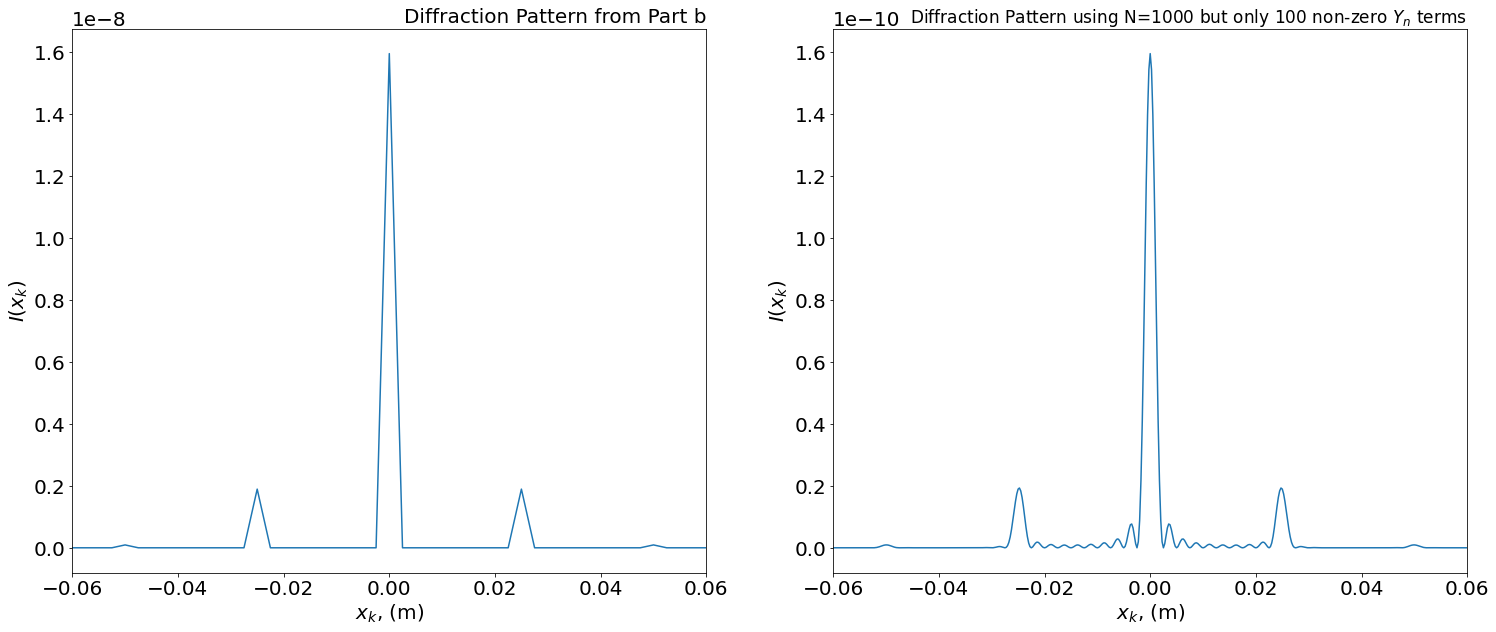

In [10]:
fig = plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.xlabel("$x_k$, (m)")
plt.ylabel("$I(x_k)$")               
plt.title('Diffraction Pattern from Part b',loc='right',fontsize=20)
plt.plot(x_k,I_x)
plt.xlim(-0.06,0.06) 

plt.subplot(1,2,2)
plt.xlabel("$x_k$, (m)")
plt.ylabel("$I(x_k)$")               
plt.title('Diffraction Pattern using N=1000 but only 100 non-zero $Y_n$ terms ',fontsize=17,loc='right')
plt.plot(XK,IX)
plt.xlim(-0.06,0.06)   
plt.show()

This above plot looks more like diffraction patten intensities I used to see in undergrad class. Here, you can see the central maxima and the pattern like Airy disc. So the above pattern is with increased width and padded out $y_n$ terms.

Now, if we don't follow the instruction on padding out extra $y_n$ terms then after increasing the width and keeping all the $y_n$ terms, we got the following plot (see figure 6)

In [11]:
###calculating I(x_k) with increased width W=10w
alpha=np.pi/20e-6
W=2000e-6    ###W=10w
N=1000
Y_n=np.sqrt(gratting_func(alpha,W,N))##instead of w, this time we are calculating using W=10w and N'=10N (i.e 1000)
C_k=np.fft.fft(Y_n)
C_k_0=np.fft.fftshift(C_k)          ## shifted the Fourier spectrum so that k=0 would be in the center
I_X=(w**2/N**2)*(abs(C_k_0)**2) 
###calculating x_k with W=10w
k=np.arange(-N//2,N//2,1)
X_k=(lamb*f)/W*k

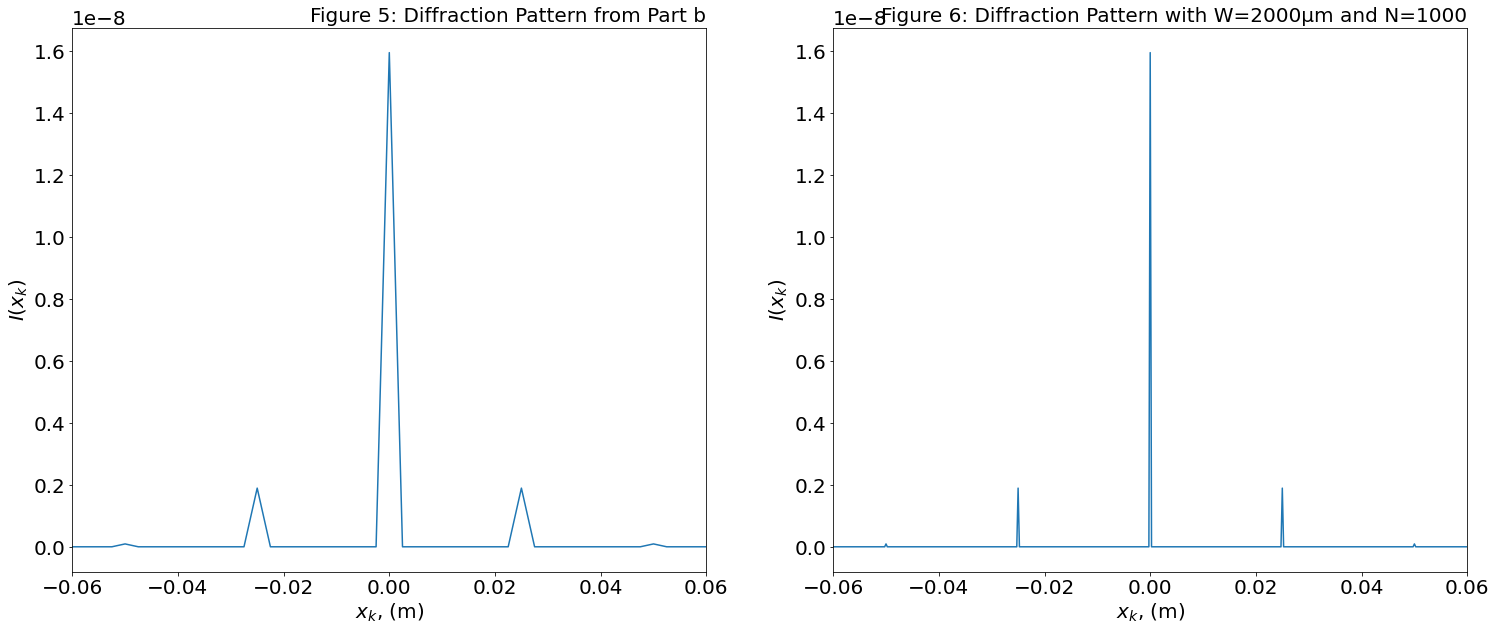

In [12]:
fig = plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.xlabel("$x_k$, (m)")
plt.ylabel("$I(x_k)$")               
plt.title('Figure 5: Diffraction Pattern from Part b',loc='right',fontsize=20)
plt.plot(x_k,I_x)
plt.xlim(-0.06,0.06)   

plt.subplot(1,2,2)
plt.xlabel("$x_k$, (m)")
plt.ylabel("$I(x_k)$")               
plt.title('Figure 6: Diffraction Pattern with W=2000µm and N=1000',loc='right',fontsize=20)
plt.plot(X_k,I_X)
plt.xlim(-0.06,0.06)

plt.show()

Comment:

Intensities matched at same values of x for both plots, plot with $W=10w$ has better resolution but only for coarse pattern which I don't know if helpful or not.

# Problem#2. Euler’s Method

Consider the ordinary differential equation
$$\frac{dx}{dt}=\frac{2x}{t}\hspace{60mm} (1)$$
## Part (a) 

$\textbf{Question:}$ Show analytically by separation of variables that the solution is
$x (t) = Ct^2$ for any constant C:

$\textbf{Solution:}$

Using variable saparable technique equation (1) will be of form:


$$\frac{dx}{2x}=\frac{dt}{t}$$

Now integrating both sides:
$$\int\frac{dx}{x}=2\int\frac{dt}{t}$$

$$\ln x=2\ln t+\ln C$$

$$\ln x=\ln Ct^2$$
which implies:
$$x(t)=Ct^2 \hspace{10mm} (proved)$$

## Part (b)

$\textbf{Question:}$ Use Euler’s method for t in the interval 1 to 2, starting with $x(1) = 1$, and using a value $C = 1$. Plot the result for 10 points in the interval, along with the the analytical solution. Repeat for 20, 40, and 80 points, and plot the results all together.

$\textbf{Solution:}$

Euler method is given as: $$x(t+h)=x(t)+hf(x,t)$$ where, $f(x,t)\equiv\frac{dx}{dt}$, and $h$ is step-size for next point

In [13]:
def f(x,t):
    return 2*x/t
##Euler Method in interval t: [1,2]
N=10
t=np.linspace(1,2,N)  ## N t values between 1 & 2 
h=t[1]-t[0]   ###stepsize
x=np.full_like(t,0)
x[0]=1     ##initial value of x at t=1 is given as 1
for i in range(len(x)-1):
    x[i + 1] = x[i] + h*f(x[i], t[i])
### Analytical result:
C=1
xt=C*t**2    ##x(t)=Ct^2

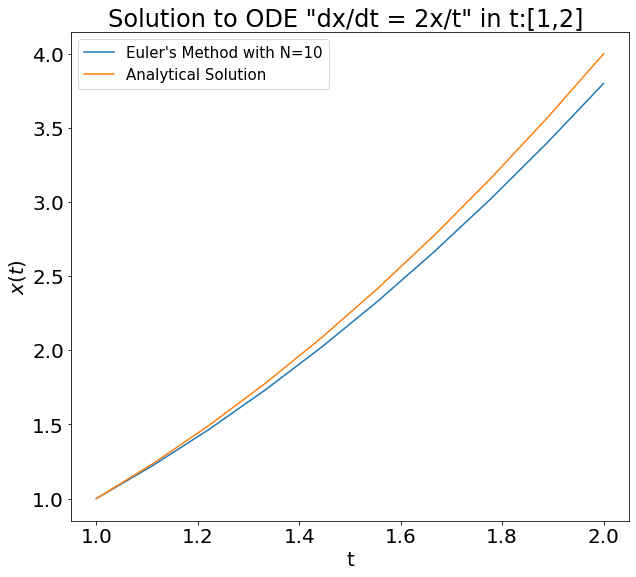

In [14]:
fig = plt.figure(figsize=(10,9))
plt.xlabel("t")
plt.ylabel('$x(t)$')
plt.title('Solution to ODE "dx/dt = 2x/t" in t:[1,2] ')
plt.plot(t,x,label="Euler's Method with N=10")
plt.plot(t,xt,label='Analytical Solution')
plt.legend(loc='best',fontsize=15)
plt.show()

$\textbf{Question:}$  Repeat for 20, 40, and 80 points, and plot the results all together.


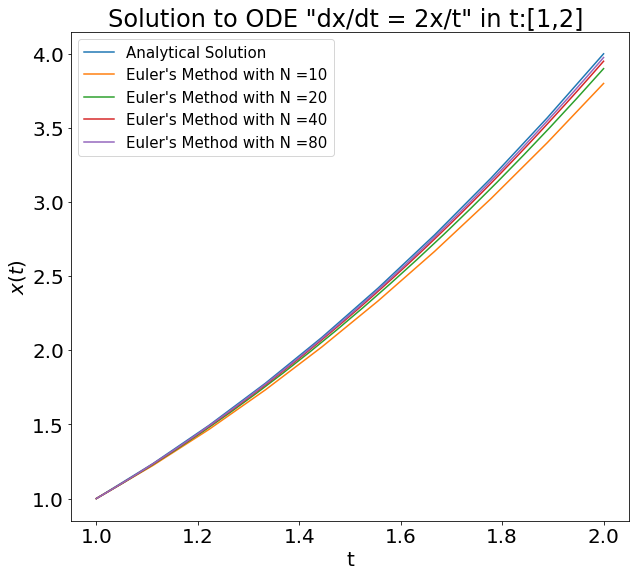

In [15]:
### Repeating for N= 20, 40, and 80 points, and plotting the results all together.
fig = plt.figure(figsize=(10,9))
plt.xlabel("t")
plt.ylabel('$x(t)$')
plt.title('Solution to ODE "dx/dt = 2x/t" in t:[1,2] ')
plt.plot(t,xt,label='Analytical Solution')    ### Analytical solution
for N in [10,20,40,80]:            
    t=np.linspace(1,2,N)  
    h=t[1]-t[0]
    x=np.full_like(t,0)
    x[0]=1                ##initial value of x at t=1 is given as 1
    for i in range(len(x)-1):
        x[i + 1] = x[i] + h*f(x[i], t[i])
    plt.plot(t,x,label="Euler's Method with N ="+str(N))
    plt.legend(loc='best',fontsize=15)
plt.show()

## Part c
$\textbf{Question:}$Plot the error vs. the analytical result for x (t = 2) as a function of the step size h

$\textbf{Solution:}$



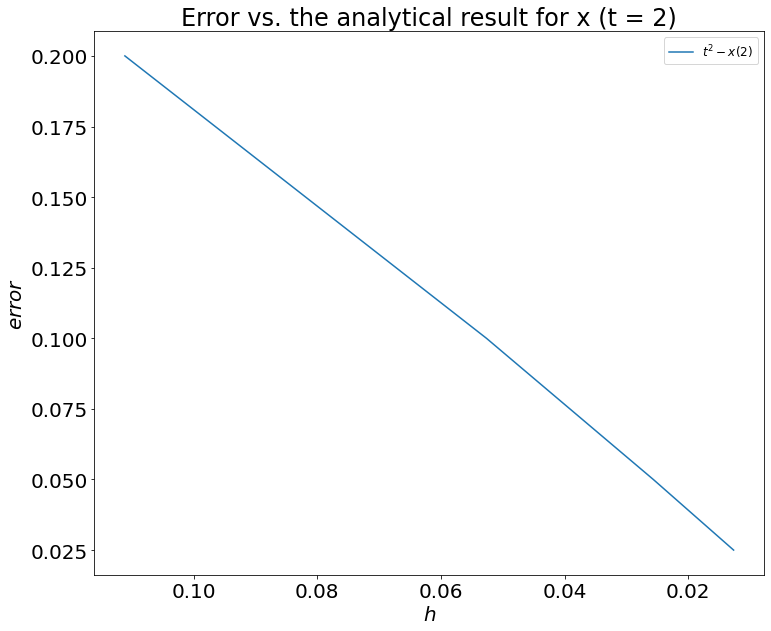

In [16]:
fig = plt.figure(figsize=(12,10))
plt.xlabel("$h$")
plt.ylabel('$error$')
plt.title('Error vs. the analytical result for x (t = 2)')
plt.gca().invert_xaxis()
error=[]
H=[]
for N in [10,20,40,80]:
    t=np.linspace(1,2,N) 
    h=t[1]-t[0]          ##step-size
    x=np.full_like(t,0)
    x[0]=1              ##initial value of x at t=1 is given as 1
    for i in range(len(x)-1):
        x[i + 1] = x[i] + h*f(x[i], t[i])
    err=xt[-1]-x[-1]      ### xt[-1]=x(t=2)=Ct^2=4.0
    error.append(err)
    H.append(h)
plt.plot(H,error,label='$t^2-x(2)$')
plt.legend(loc='best',fontsize=12)
plt.show()

### Note: I inversted the x-axis to show that, with decrease in stepsize error decrease

As we can see, with decrease in stepsize, error is reduced in Euler's method linearly. The above plot shows the difference in values of $x(t=2)$ between analytical solution and Euler's method i.e. $t^2-x(2)$ as C=1 given. Here $x(2)$ is calculated by Euler's method for different number of steps $N$ $\in$ [10, 20, 40, 80] given in the problem.

In lecture, the total cummulative error for a solution from $t = a$ to $t = b$ is given by equation (8.8) of textbook:
$$\sum_{k=0}^{N-1}\frac{1}{2}h^2\left(\frac{d^2x}{dt^2}\right)_{x_k,t_k}=\frac{1}{2}h[f(x(b),b)-f(x(a),a)]$$
In our case $a=1$ and $b=2$. Thought we haven't computed cumulative error, we found total error from $Ct^2-x(2)$ which would be same if we compute using (8.8) which is still linearly dependent on $h$ as seen in the above plot. Knowing analytical solution allows us to compute total error for any point x(t)

# Problem#3 Garcia 5.16, Fast Fourier Transform by hand

$\textbf{Question:}$ A good way to understand how an algorithm works is to work a small example by hand.
Evaluate the discrete Fourier transform of y = [0, 1, 0, −1] using: (a) the direct summa-
tion, and (b) the FFT algorithm. Be sure to show the intermediate steps in the calculation.
Hint: You may find it convenient to refer to the corresponding section from Garcia’s text-
book, Garcia_FFT.pdf, on CatCourses. This seemed clearer to me about the exact steps
than Newman’s textbook.

$\textbf{Solution:}$


$\textbf{Part a: The direct summation}$

$$y_n=[0,1,0,-1]$$
Number of term are 4 i.e. $N=4$

DFT in conventional definition is given by:
$$c_k=\sum_{n=0}^{N-1}y_nexp\left(-i\frac{2\pi kn}{N}\right)$$
This means with direct summmation we can find out $c_k$ terms:
$$c_0=0+1+(-1)+0=0$$


$$c_1=0+1.exp\left(-i\frac{2\pi 1}{4}\right)+0-1.exp\left(-i\frac{2\pi (-1)}{4}\right)$$
$$c_1=0+cos(\pi/2)-isin(\pi/2)+0-cos(\pi/2)-isin(\pi/2)$$
$$c_1=-2i$$

$$c_2=0+1.exp\left(-i\frac{2\pi 2}{4}\right)+0-1.exp\left(-i\frac{2\pi 2(-1)}{4}\right)$$
$$c_2=0+cos(\pi)-isin(\pi)+0-cos(\pi)-isin(\pi)$$
$$c_2=0$$

$$c_3=0+1.exp\left(-i\frac{2\pi 3(1)}{4}\right)+0-1.exp\left(-i\frac{2\pi 3(-1)}{4}\right)$$
$$c_3=0+cos(3\pi/2)-isin(3\pi/2)+0-cos(3\pi/2)-isin(3\pi/2)$$
$$c_3=2i$$

Therefore, $$c_k=[0,-2i,0,2i]$$

In [17]:
#From textbook DFT algorithm is simply:
def DFT(y):   
    N=len(y)
    c=np.zeros(N,complex)
    for k in range(N):
        for n in range(N):
            c[k]+=y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

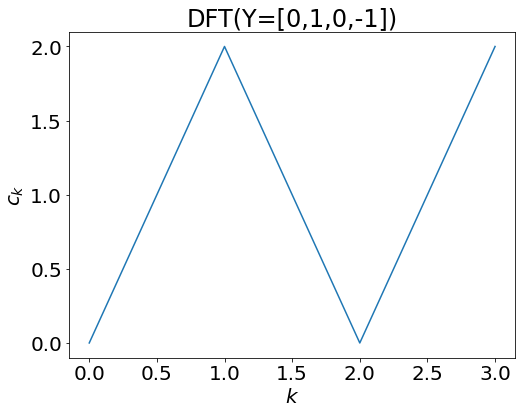

C_k from DFT are:  [ 0.00000000e+00+0.0000000e+00j  2.44929360e-16-2.0000000e+00j
  0.00000000e+00+2.4492936e-16j -7.34788079e-16+2.0000000e+00j]


In [18]:
Y=[0,1,0,-1]
D_F=DFT(Y)
fig = plt.figure(figsize=(8,6))
plt.xlabel("$k$")
plt.ylabel('$c_k$')
plt.plot(abs(D_F))
plt.title('DFT(Y=[0,1,0,-1])')
plt.show()
print('C_k from DFT are: ',D_F)

$\textbf{Part b:  FFT algorithm}$

$$y_n=[0,1,0,-1]$$
Number of term are 4 i.e. $N=4$

Step 1: Deviding input $y_n$ into even and odd

$y_e=[0,0]$, $y_o=[1,-1]$

Step 2: Recursive step; deviding $y_e$ and $y_o$ into even and odd again till the length of input is one

$\textbf{y_e}:$

$y_{e;even}$, $y_{e;odd}=[0],[0]$

$\textbf{y_o}:$

$y_{o;even}$, $y_{o;odd}=[1],[-1]$

Step 3(stage 1): Applying equation (7.39) of textbook to get $c_k$ terms for $y_e$ first

$$c_{ke}[i]=y_{e:even}[i]+exp\left(\frac{-i2\pi k}{n}\right)y_{e:odd}[i]$$
$$c_{ke}[i+n/2]=y_{e:even}[i]+exp\left(\frac{-i2\pi (k+n/2)}{n}\right)y_{e:odd}[i]$$

where n is length of $y_e$

If we solve the above equations we will get:

$$c_{ke}[0]=0+exp\left(\frac{-i2\pi 0}{2}\right)0$$
$$c_{ke}[0]=0$$


$$c_{ke}[1]=0+exp\left(-i\pi\right)0$$
$$c_{ke}[1]=0$$

Step 4a (stage 2): Applying equation (7.39) of textbook to get $c_k$ terms for $y_0$

$$c_{ko}[0]=1+exp\left(\frac{-i2\pi 0}{2}\right)-1$$
$$c_{ko}[0]=1-1$$
$$c_{ko}[0]=0$$

$$c_{ko}[1]=1+exp\left(-i\pi\right)(-1)$$
$$c_{ko}[1]=1+(\cos \pi-i\sin \pi)(-1)$$
$$c_{ko}[1]=2$$

Step 4b: Applying equation (7.39) of textbook to even set $c_{ke}=[0,0]$, and odd set $c_{ko}=[0,2]$ to get $c_k$ terms for $y_n$. This time $i$ goes from 0 to 1, and $n=4$, which is length of $y_n$, so:
$$c_{k}[i]=c_{ke}[i]+exp\left(\frac{-i2\pi k}{n}\right)c_{ko}[i]$$
$$c_{k}[i+n/2]=c_{ke}[i]+exp\left(\frac{-i2\pi (k+n/2)}{n}\right)c_{ko}[i]$$

Above set of equations will give us four coefficients. Starting with $i=0$:
$$c_{k}[0]=c_{ke}[0]+exp\left(\frac{-i2\pi k}{4}\right)c_{ko}[0]$$
$$c_{k}[0]=0+exp\left(\frac{-i2\pi 0}{4}\right)0$$
$$c_{k}[0]=0+0$$
$$c_{k}[0]=0$$

$$c_{k}[0+4/2]=yc_{ke}[0]+exp\left(\frac{-i2\pi (0+4/2)}{4}\right)c_{ko}[0]$$
$$c_{k}[2]=0+exp\left(-i\pi\right)0$$
$$c_{k}[2]=0+exp\left(-i\pi\right)0$$
$$c_{k}[2]=0$$

Now for $i=1$:
$$c_{k}[1]=c_{ke}[1]+exp\left(\frac{-i2\pi 1}{4}\right)c_{ko}[1]$$
$$c_{k}[1]=0+exp\left(\frac{-i2\pi 1}{4}\right)2$$
$$c_{k}[1]=0+(-i)2$$
$$c_{k}[1]=-2i$$


$$c_{k}[1+4/2]=yc_{ke}[1]+exp\left(\frac{-i2\pi (1+4/2)}{4}\right)c_{ko}[1]$$
$$c_{k}[3]=0+exp\left(\frac{-i3\pi}{2}\right)2$$
$$c_{k}[3]=0+exp\left(\frac{-i3\pi}{2}\right)2$$
$$c_{k}[3]=0+exp\left(\frac{-i3\pi}{2}\right)2$$
$$c_{k}[3]=0+(i)2$$
$$c_{k}[3]=2i$$

Therefore, the vlaues we got are :

$$c_k=[0,-2i,0,2i]$$

$\textbf{We solved this problem in two stages: First we calculated $c_{ke}$ and $c_{ko}$, then in the second stage we calculated $c_{k}$}$
$\textbf{because number of stages are $m$ and are related to number of elements $N$ by: $N=2^m$}$

In [19]:
def FFT(T):  
    N=len(T)
    if N==1:
        return T
    ## deviding input T into even and odd points making two separate inputs
    y_e,y_o=T[0::2],T[1::2]
    ##Now feeding the odd and even T terms into FFT again (till length of the array T is just one)
    y_even,y_odd=FFT(y_e),FFT(y_o)
    ##Now calculating c_k for F_even, and F_odd from bottom to top 
    F=np.zeros(N,complex)
    for i in range(N//2):
        F[i]=y_even[i]+np.exp(-2j*np.pi*(i)/N)*y_odd[i]
        F[i+N//2]=y_even[i]+np.exp(-2j*np.pi*(i+N//2)/N)*y_odd[i]
    return F

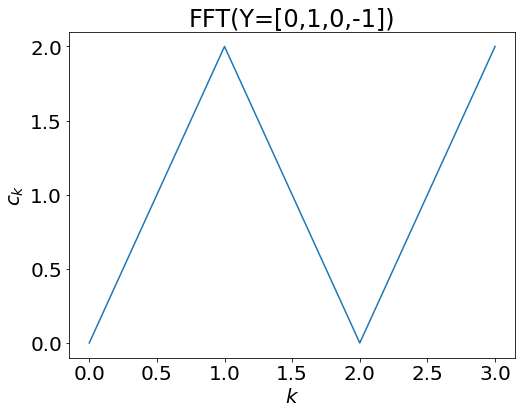

C_k from FFT are:  [ 0.0000000e+00+0.j  2.4492936e-16-2.j  0.0000000e+00+0.j
 -4.8985872e-16+2.j]


In [20]:
F=FFT(Y)
fig = plt.figure(figsize=(8,6))
plt.xlabel("$k$")
plt.ylabel('$c_k$')
plt.plot(abs(F))
plt.title('FFT(Y=[0,1,0,-1])')
plt.show()
print('C_k from FFT are: ',F)